In [1]:
import mysql.connector as connection
import pandas as pd
import sys
sys.path.append('/Users/eavallon/Desktop/APA/shelterluv_cache/')
import sl_config
import matplotlib.pyplot as plt
import collections
import numpy as np

In [111]:
dbdw =connection.connect(host=sl_config.dbhost,user=sl_config.dbuser,passwd=sl_config.dbpassword,database='shelterluv')

In [4]:
date_query = """select DateDate as date
                from Dates
                where DateDate between '2019-01-00 00:00:00.0' and '2023-11-02 00:00:00.0'
                and (DateDate like '%-01 %'
                or DateDate like '%-15 %')"""

In [5]:
dates = pd.read_sql(date_query,dbdw)

In [6]:
q0 = f"""
    with onsite_status as (
        select stat.`AnimalInternal-ID`
        from AnimalsStatusHistory stat
        left join StatusTypes st on stat.AnimalStatus = st.AnimalStatus
        where st.Location = 'Shelter'
          and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        loc as (select loc.`AnimalInternal-ID`
        from AnimalsLocationHistory loc
        where loc.AnimalCurrentLocationTier1 = 'Dog'
          and loc.AnimalCurrentLocationTier2 = 'TLAC'
          and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        pink as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Pink%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        orange as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Orange%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        blue as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Blue%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        silver as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Silver%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        yellow as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Yellow%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        red as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Red%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        purple as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'Purple%'
                or acv.CategoryVolunteer like 'AAC%')
                and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        nope as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'None%'
                or acv.CategoryVolunteer is null)
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd))

        select '{dates['date'][0]}' as Date,
               count(pink.`AnimalInternal-ID`) as Pink,
               count(orange.`AnimalInternal-ID`) as Orange,
               count(blue.`AnimalInternal-ID`) as Blue,
               count(silver.`AnimalInternal-ID`) as Silver,
               count(yellow.`AnimalInternal-ID`) as Yellow,
               count(red.`AnimalInternal-ID`) as Red,
               count(purple.`AnimalInternal-ID`) as Purple,
               count(nope.`AnimalInternal-ID`) as None
        from Animals a
        left join onsite_status on a.`AnimalInternal-ID` = onsite_status.`AnimalInternal-ID`
        left join loc on a.`AnimalInternal-ID` = loc.`AnimalInternal-ID`
        left join pink on a.`AnimalInternal-ID` = pink.`AnimalInternal-ID`
        left join orange on a.`AnimalInternal-ID` = orange.`AnimalInternal-ID`
        left join blue on a.`AnimalInternal-ID` = blue.`AnimalInternal-ID`
        left join silver on a.`AnimalInternal-ID` = silver.`AnimalInternal-ID`
        left join yellow on a.`AnimalInternal-ID` = yellow.`AnimalInternal-ID`
        left join red on a.`AnimalInternal-ID` = red.`AnimalInternal-ID`
        left join purple on a.`AnimalInternal-ID` = purple.`AnimalInternal-ID`
        left join nope on a.`AnimalInternal-ID` = nope.`AnimalInternal-ID`
        where onsite_status.`AnimalInternal-ID` is not null
        and loc.`AnimalInternal-ID` is not null
        and a.DeletedFromSL is null;
        """

In [7]:
ccs = pd.read_sql(q0,dbdw)

In [8]:
ccs

,Date,Pink,Orange,Blue,Silver,Yellow,Red,Purple,None
0,2019-01-01 23:59:59,7,15,21,84,24,24,0,0


In [9]:
# Loop through the dates
for date in dates['date'][1:]:
    # Build and execute the query with the current date
    qi = f"""
        with onsite_status as (
        select stat.`AnimalInternal-ID`
        from AnimalsStatusHistory stat
        left join StatusTypes st on stat.AnimalStatus = st.AnimalStatus
        where st.Location = 'Shelter'
          and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        loc as (select loc.`AnimalInternal-ID`
        from AnimalsLocationHistory loc
        where loc.AnimalCurrentLocationTier1 = 'Dog'
          and loc.AnimalCurrentLocationTier2 = 'TLAC'
          and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        pink as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Pink%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        orange as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Orange%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        blue as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Blue%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        silver as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Silver%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        yellow as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Yellow%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        red as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Red%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        purple as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'Purple%'
                or acv.CategoryVolunteer like 'AAC%')
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        nope as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'None%'
                or acv.CategoryVolunteer is null)
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd))

        select '{date}' as Date,
               count(pink.`AnimalInternal-ID`) as Pink,
               count(orange.`AnimalInternal-ID`) as Orange,
               count(blue.`AnimalInternal-ID`) as Blue,
               count(silver.`AnimalInternal-ID`) as Silver,
               count(yellow.`AnimalInternal-ID`) as Yellow,
               count(red.`AnimalInternal-ID`) as Red,
               count(purple.`AnimalInternal-ID`) as Purple,
               count(nope.`AnimalInternal-ID`) as None
        from Animals a
        left join onsite_status on a.`AnimalInternal-ID` = onsite_status.`AnimalInternal-ID`
        left join loc on a.`AnimalInternal-ID` = loc.`AnimalInternal-ID`
        left join pink on a.`AnimalInternal-ID` = pink.`AnimalInternal-ID`
        left join orange on a.`AnimalInternal-ID` = orange.`AnimalInternal-ID`
        left join blue on a.`AnimalInternal-ID` = blue.`AnimalInternal-ID`
        left join silver on a.`AnimalInternal-ID` = silver.`AnimalInternal-ID`
        left join yellow on a.`AnimalInternal-ID` = yellow.`AnimalInternal-ID`
        left join red on a.`AnimalInternal-ID` = red.`AnimalInternal-ID`
        left join purple on a.`AnimalInternal-ID` = purple.`AnimalInternal-ID`
        left join nope on a.`AnimalInternal-ID` = nope.`AnimalInternal-ID`
        where onsite_status.`AnimalInternal-ID` is not null
        and loc.`AnimalInternal-ID` is not null
        and a.DeletedFromSL is null;
        """

    ccs_i = pd.read_sql(qi,dbdw)
    ccs = ccs.append(ccs_i,ignore_index=True)
    print(date)

2019-01-15 23:59:59
2019-02-01 23:59:59
2019-02-15 23:59:59
2019-03-01 23:59:59
2019-03-15 23:59:59
2019-04-01 23:59:59
2019-04-15 23:59:59
2019-05-01 23:59:59
2019-05-15 23:59:59
2019-06-01 23:59:59
2019-06-15 23:59:59
2019-07-01 23:59:59
2019-07-15 23:59:59
2019-08-01 23:59:59
2019-08-15 23:59:59
2019-09-01 23:59:59
2019-09-15 23:59:59
2019-10-01 23:59:59
2019-10-15 23:59:59
2019-11-01 23:59:59
2019-11-15 23:59:59
2019-12-01 23:59:59
2019-12-15 23:59:59
2020-01-01 23:59:59
2020-01-15 23:59:59
2020-02-01 23:59:59
2020-02-15 23:59:59
2020-03-01 23:59:59
2020-03-15 23:59:59
2020-04-01 23:59:59
2020-04-15 23:59:59
2020-05-01 23:59:59
2020-05-15 23:59:59
2020-06-01 23:59:59
2020-06-15 23:59:59
2020-07-01 23:59:59
2020-07-15 23:59:59
2020-08-01 23:59:59
2020-08-15 23:59:59
2020-09-01 23:59:59
2020-09-15 23:59:59
2020-10-01 23:59:59
2020-10-15 23:59:59
2020-11-01 23:59:59
2020-11-15 23:59:59
2020-12-01 23:59:59
2020-12-15 23:59:59
2021-01-01 23:59:59
2021-01-15 23:59:59
2021-02-01 23:59:59


In [10]:
ccs.to_csv('/Users/eavallon/Desktop/APA/APA_AnalysisTrials/CollarColorTrend.csv',index=False)

In [2]:
cct = pd.read_csv('/Users/eavallon/Desktop/APA/APA_AnalysisTrials/CollarColorTrend.csv')

In [3]:
beg = cct['Pink'] + cct['Orange'] + cct['Blue'] + cct['None']
adv = cct['Silver'] + cct['Yellow'] + cct['Red'] + cct['Purple']

In [4]:
totalpop = cct.transpose().drop(['Date']).sum()

In [5]:
totalpop.index = cct['Date']

In [6]:
cct['TotalPop'] = totalpop.values

In [7]:
yr = np.zeros(len(cct))

In [8]:
yr[0:24] = 2019
yr[24:48] = 2020
yr[48:72] = 2021
yr[72:96] = 2022
yr[96:] = 2023

In [9]:
cct['Year'] = yr

In [10]:
cct['AdvancedCC'] = adv
cct['BeginnerCC'] = beg

In [11]:
adv2019 = cct[cct['Year'] == 2019]['AdvancedCC'].mean()
beg2019 = cct[cct['Year'] == 2019]['BeginnerCC'].mean()
adv2020 = cct[cct['Year'] == 2020]['AdvancedCC'].mean()
beg2020 = cct[cct['Year'] == 2020]['BeginnerCC'].mean()
adv2021 = cct[cct['Year'] == 2021]['AdvancedCC'].mean()
beg2021 = cct[cct['Year'] == 2021]['BeginnerCC'].mean()
adv2022 = cct[cct['Year'] == 2022]['AdvancedCC'].mean()
beg2022 = cct[cct['Year'] == 2022]['BeginnerCC'].mean()
adv2023 = cct[cct['Year'] == 2023]['AdvancedCC'].mean()
beg2023 = cct[cct['Year'] == 2023]['BeginnerCC'].mean()

In [71]:
tot2019 = cct[cct['Year'] == 2019]['TotalPop'].mean()
tot2020 = cct[cct['Year'] == 2020]['TotalPop'].mean()
tot2021 = cct[cct['Year'] == 2021]['TotalPop'].mean()
tot2022 = cct[cct['Year'] == 2022]['TotalPop'].mean()
tot2023 = cct[cct['Year'] == 2023]['TotalPop'].mean()

tot2019s = cct[cct['Year'] == 2019]['TotalPop'].std()
tot2020s = cct[cct['Year'] == 2020]['TotalPop'].std()
tot2021s = cct[cct['Year'] == 2021]['TotalPop'].std()
tot2022s = cct[cct['Year'] == 2022]['TotalPop'].std()
tot2023s = cct[cct['Year'] == 2023]['TotalPop'].std()

In [47]:
adv2019s = cct[cct['Year'] == 2019]['AdvancedCC'].std()
beg2019s = cct[cct['Year'] == 2019]['BeginnerCC'].std()
adv2020s = cct[cct['Year'] == 2020]['AdvancedCC'].std()
beg2020s = cct[cct['Year'] == 2020]['BeginnerCC'].std()
adv2021s = cct[cct['Year'] == 2021]['AdvancedCC'].std()
beg2021s = cct[cct['Year'] == 2021]['BeginnerCC'].std()
adv2022s = cct[cct['Year'] == 2022]['AdvancedCC'].std()
beg2022s = cct[cct['Year'] == 2022]['BeginnerCC'].std()
adv2023s = cct[cct['Year'] == 2023]['AdvancedCC'].std()
beg2023s = cct[cct['Year'] == 2023]['BeginnerCC'].std()

In [25]:
adv2019_prop = (cct[cct['Year'] == 2019]['AdvancedCC']/cct[cct['Year'] == 2019]['TotalPop']).mean()
beg2019_prop = (cct[cct['Year'] == 2019]['BeginnerCC']/cct[cct['Year'] == 2019]['TotalPop']).mean()
adv2020_prop = (cct[cct['Year'] == 2020]['AdvancedCC']/cct[cct['Year'] == 2020]['TotalPop']).mean()
beg2020_prop = (cct[cct['Year'] == 2020]['BeginnerCC']/cct[cct['Year'] == 2020]['TotalPop']).mean()
adv2021_prop = (cct[cct['Year'] == 2021]['AdvancedCC']/cct[cct['Year'] == 2021]['TotalPop']).mean()
beg2021_prop = (cct[cct['Year'] == 2021]['BeginnerCC']/cct[cct['Year'] == 2021]['TotalPop']).mean()
adv2022_prop = (cct[cct['Year'] == 2022]['AdvancedCC']/cct[cct['Year'] == 2022]['TotalPop']).mean()
beg2022_prop = (cct[cct['Year'] == 2022]['BeginnerCC']/cct[cct['Year'] == 2022]['TotalPop']).mean()
adv2023_prop = (cct[cct['Year'] == 2023]['AdvancedCC']/cct[cct['Year'] == 2023]['TotalPop']).mean()
beg2023_prop = (cct[cct['Year'] == 2023]['BeginnerCC']/cct[cct['Year'] == 2023]['TotalPop']).mean()

In [72]:
adv2019_props = (cct[cct['Year'] == 2019]['AdvancedCC']/cct[cct['Year'] == 2019]['TotalPop']).std()
beg2019_props = (cct[cct['Year'] == 2019]['BeginnerCC']/cct[cct['Year'] == 2019]['TotalPop']).std()
adv2020_props = (cct[cct['Year'] == 2020]['AdvancedCC']/cct[cct['Year'] == 2020]['TotalPop']).std()
beg2020_props = (cct[cct['Year'] == 2020]['BeginnerCC']/cct[cct['Year'] == 2020]['TotalPop']).std()
adv2021_props = (cct[cct['Year'] == 2021]['AdvancedCC']/cct[cct['Year'] == 2021]['TotalPop']).std()
beg2021_props = (cct[cct['Year'] == 2021]['BeginnerCC']/cct[cct['Year'] == 2021]['TotalPop']).std()
adv2022_props = (cct[cct['Year'] == 2022]['AdvancedCC']/cct[cct['Year'] == 2022]['TotalPop']).std()
beg2022_props = (cct[cct['Year'] == 2022]['BeginnerCC']/cct[cct['Year'] == 2022]['TotalPop']).std()
adv2023_props = (cct[cct['Year'] == 2023]['AdvancedCC']/cct[cct['Year'] == 2023]['TotalPop']).std()
beg2023_props = (cct[cct['Year'] == 2023]['BeginnerCC']/cct[cct['Year'] == 2023]['TotalPop']).std()

In [73]:
adv_mean = np.array([adv2019,adv2020,adv2021,adv2022,adv2023])
adv_std = np.array([adv2019s,adv2020s,adv2021s,adv2022s,adv2023s])
beg_mean = np.array([beg2019,beg2020,beg2021,beg2022,beg2023])
beg_std = np.array([beg2019s,beg2020s,beg2021s,beg2022s,beg2023s])
advprop_mean = np.array([adv2019_prop,adv2020_prop,adv2021_prop,adv2022_prop,adv2023_prop])
advprop_std = np.array([adv2019_props,adv2020_props,adv2021_props,adv2022_props,adv2023_props])
begprop_mean = np.array([beg2019_prop,beg2020_prop,beg2021_prop,beg2022_prop,beg2023_prop])
begprop_std = np.array([beg2019_props,beg2020_props,beg2021_props,beg2022_props,beg2023_props])

In [14]:
plot_color = {'Pink':'xkcd:pink','Orange':'xkcd:orange','Blue':'xkcd:blue','Silver':'xkcd:silver',
              'Yellow':'xkcd:gold','Red':'xkcd:red','Purple':'xkcd:purple','None':'xkcd:black'}

KeyError: 'TotalPop'

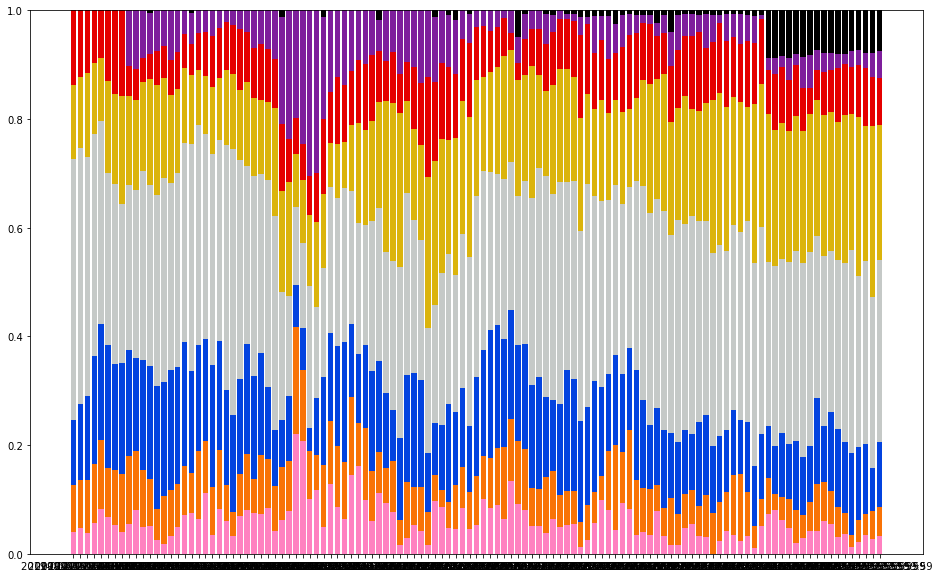

In [18]:
fig,ax = plt.subplots(figsize=(16,10))

yi = np.zeros(len(cct))

for color in cct.keys()[1:-1]:
    ax.bar(cct['Date'], cct[color]/cct['TotalPop'], label=color, bottom=yi, color=plot_color[color])
    yi += cct[color]/cct['TotalPop']

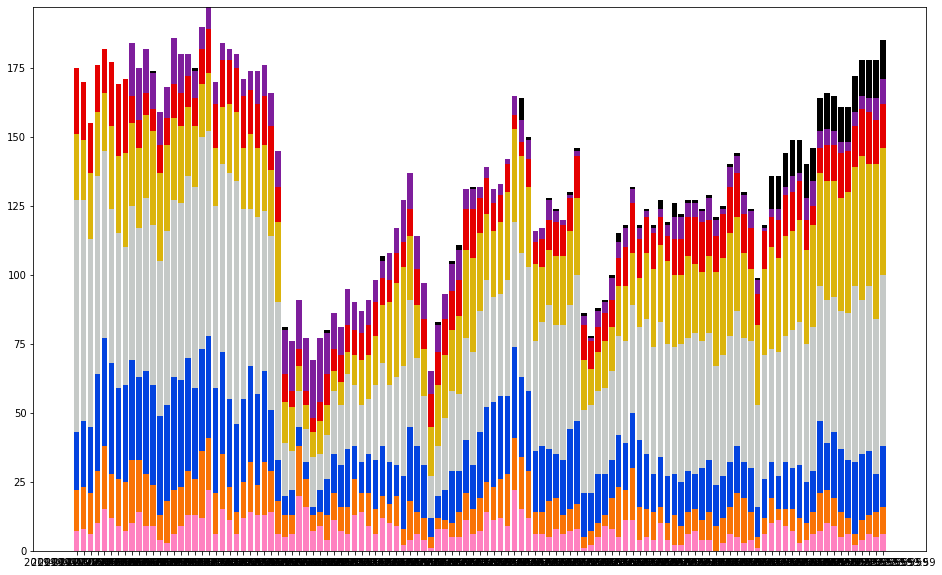

In [23]:
fig,ax = plt.subplots(figsize=(16,10))

yi0 = np.zeros(len(cct))

for color in cct.keys()[1:-1]:
    ax.bar(cct['Date'], cct[color], label=color, bottom=yi0, color=plot_color[color])
    yi0 += cct[color]

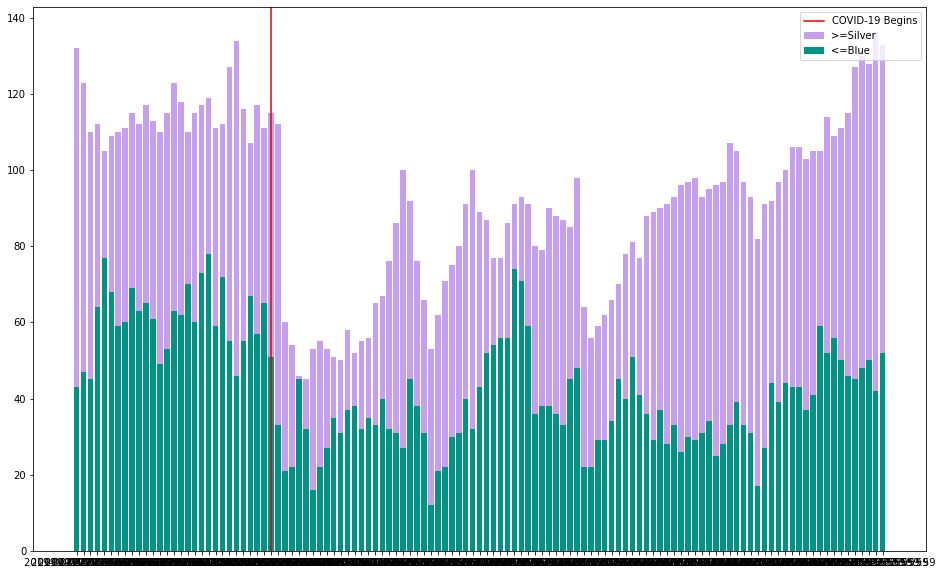

In [19]:
fig,ax = plt.subplots(figsize=(16,10))

yi = np.zeros(len(cct))

ax.bar(cct['Date'], adv, color='xkcd:lavender', label='>=Silver')
ax.bar(cct['Date'], beg, color='xkcd:teal', label = '<=Blue')
ax.axvline(cct['Date'][28], color='xkcd:red', label='COVID-19 Begins')
ax.legend(loc="upper right")

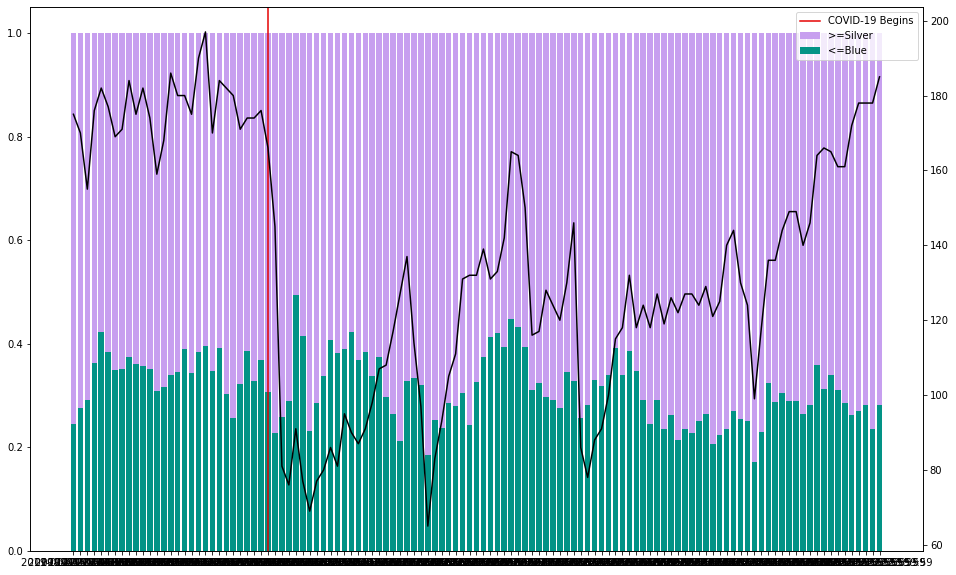

In [20]:
fig,ax = plt.subplots(figsize=(16,10))

y = np.zeros(len(cct))

ax.bar(cct['Date'], adv/cct['TotalPop'], color='xkcd:lavender', bottom=y+(beg/cct['TotalPop']), label='>=Silver')
ax.bar(cct['Date'], beg/cct['TotalPop'], color='xkcd:teal', bottom=y, label = '<=Blue')
ax.axvline(cct['Date'][28], color='xkcd:red', label='COVID-19 Begins')
ax.legend(loc="upper right")
ax2 = ax.twinx()
ax2.plot(cct['Date'], cct['TotalPop'], color='xkcd:black')

Text(0, 0.5, 'Daily Average Number of Dogs')

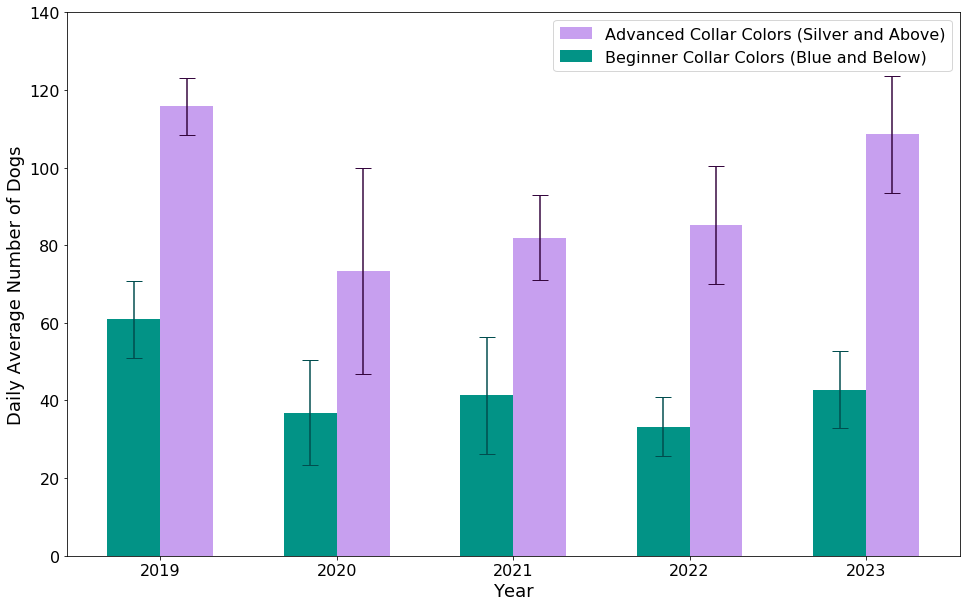

In [70]:
 fig,ax = plt.subplots(figsize=(16,10))

yrs = np.array([2019,2020,2021,2022,2023])

bottoms = np.zeros(len(yrs))

ax.bar(yrs+0.3, adv_mean,color='xkcd:lavender',width=0.3, label='Advanced Collar Colors (Silver and Above)',
       yerr=adv_std,ecolor='xkcd:dark purple',capsize=8)
ax.bar(yrs, beg_mean,width=0.3, color='xkcd:teal', label = 'Beginner Collar Colors (Blue and Below)',
       yerr=beg_std, ecolor='xkcd:dark teal',capsize=8)

# ax.errorbar(yrs+0.3, adv_mean,yerr=adv_std, color='xkcd:dark lavender')
# ax.errorbar(yrs, beg_mean,yerr=beg_std, color='xkcd:bright teal')

ax.set_ylim(0,140)
ax.legend(loc="upper right",fontsize=16)
ax.set_xlabel('Year',fontsize=18)
ax.set_xticks(yrs+0.15)
ax.set_xticklabels(yrs,fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel('Daily Average Number of Dogs',fontsize=18)

TypeError: can only concatenate list (not "float") to list

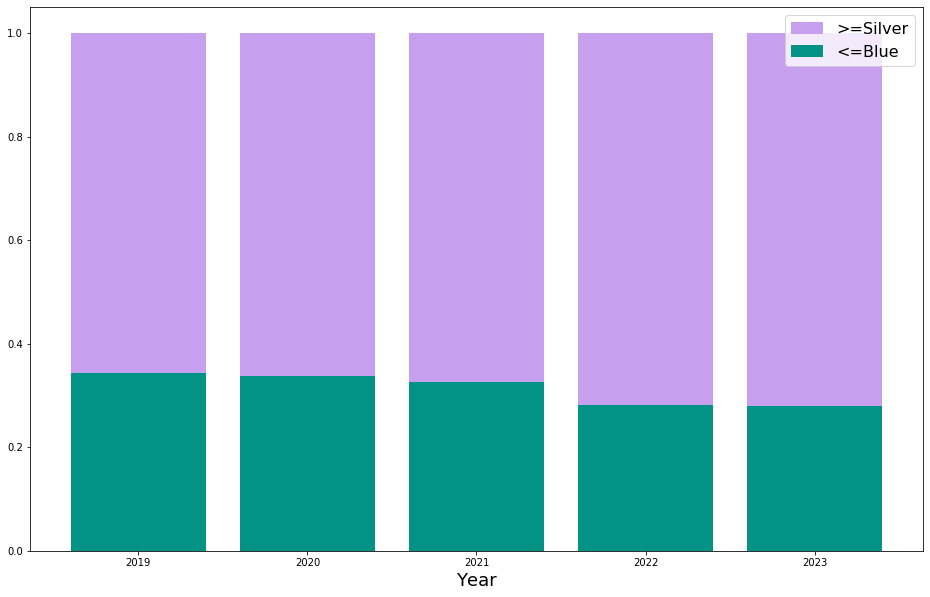

In [38]:
 fig,ax = plt.subplots(figsize=(16,10))

yrs = ['2019','2020','2021','2022','2023']

bottoms = np.zeros(len(yrs))

ax.bar(yrs, advprop_mean, bottom=bottoms+begprop_mean,color='xkcd:lavender', label='>=Silver')
ax.bar(yrs, begprop_mean, color='xkcd:teal', label = '<=Blue')
# ax.axvline('2020', color='xkcd:red', label='COVID-19 Begins')
ax.legend(loc="upper right",fontsize=16)
ax.set_xlabel('Year',fontsize=18)
ax.set_xticklabels(yrs,fontsize=16)
plt.yticks(fontsize=16)

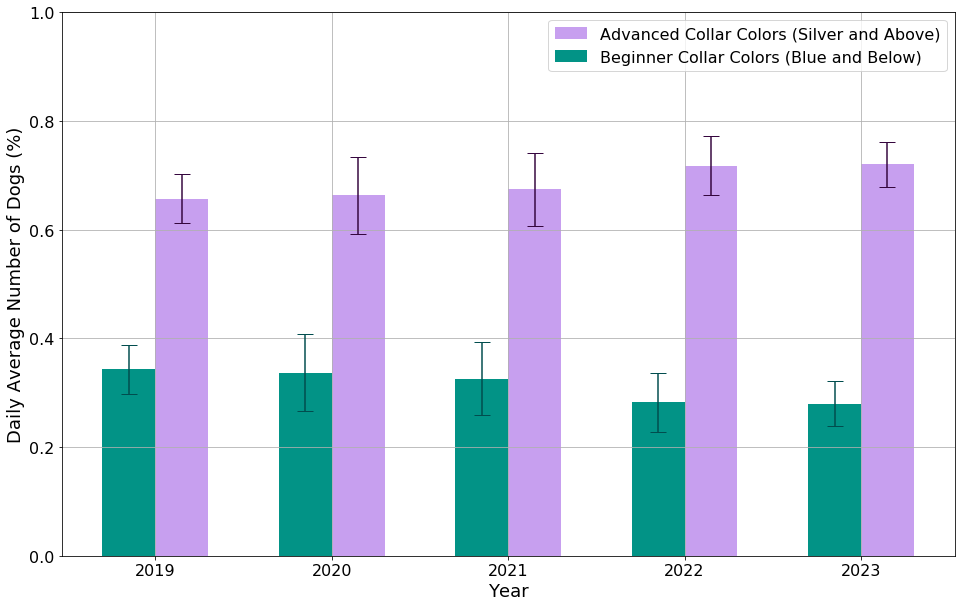

In [77]:
 fig,ax = plt.subplots(figsize=(16,10))

yrs = np.array([2019,2020,2021,2022,2023])

bottoms = np.zeros(len(yrs))

ax.bar(yrs+0.3, advprop_mean,color='xkcd:lavender',width=0.3, label='Advanced Collar Colors (Silver and Above)',
       yerr=advprop_std,ecolor='xkcd:dark purple',capsize=8)
ax.bar(yrs, begprop_mean,width=0.3, color='xkcd:teal', label = 'Beginner Collar Colors (Blue and Below)',
       yerr=begprop_std, ecolor='xkcd:dark teal',capsize=8)

# ax.errorbar(yrs+0.3, adv_mean,yerr=adv_std, color='xkcd:dark lavender')
# ax.errorbar(yrs, beg_mean,yerr=beg_std, color='xkcd:bright teal')

ax.set_yticks(np.arange(0,1,10))

ax.set_ylim(0,1)
ax.legend(loc="upper right",fontsize=16)
ax.set_xlabel('Year',fontsize=18)
ax.set_xticks(yrs+0.15)
ax.set_xticklabels(yrs,fontsize=16)
plt.yticks(fontsize=16)
ax.set_ylabel('Daily Average Number of Dogs (%)',fontsize=18)
plt.grid()

In [130]:
bite_q = """select date_format(MemoCreated,'%Y-%m') as YearMonth,
                            count(MemoID)
                    from AnimalsMemos am
                    left join Animals a on am.`AnimalInternal-ID` = a.`AnimalInternal-ID`
                    where MemoType = 'Bite Info'
                    and MemoText not like '%dopter%'
                    and MemoText not like '%foster%'
                    and MemoCreated > '2019-01-01 00:00:00.0'
                    group by YearMonth
                    order by YearMonth"""

In [131]:
bites = pd.read_sql_query(bite_q,dbdw)

In [132]:
bites

,YearMonth,count(MemoID)
0,2019-01,5
1,2019-02,3
2,2019-03,6
3,2019-04,3
4,2019-05,1
5,2019-06,2
6,2019-07,2
7,2019-08,2
8,2019-09,2
9,2019-10,2


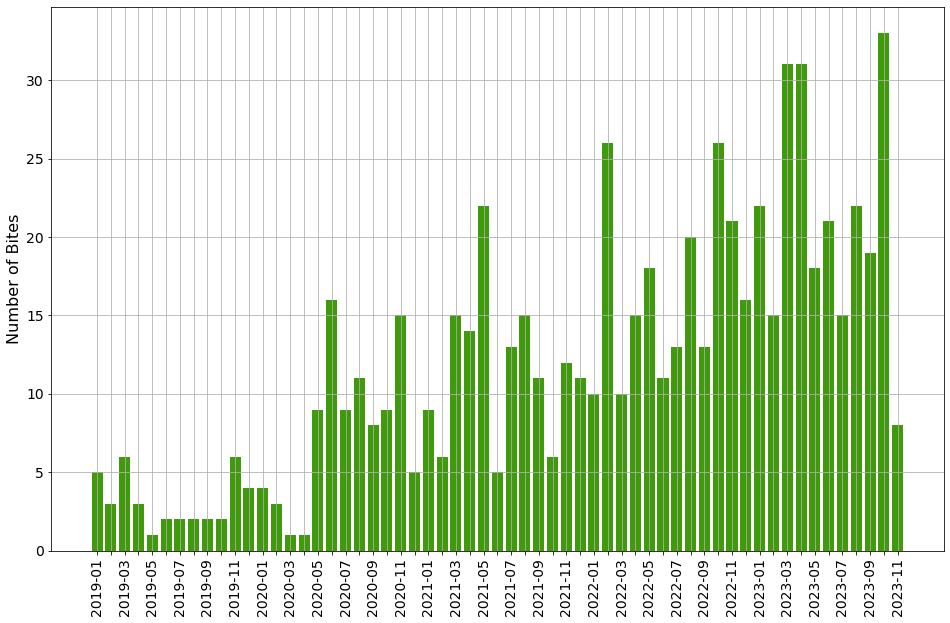

In [133]:
fig,ax = plt.subplots(figsize=(16,10))
ax.bar(bites['YearMonth'],bites['count(MemoID)'],width=0.8,color='xkcd:grass green')

ymlabels = np.array(bites['YearMonth'].values)
ymlabels[1::2] = None

ax.set_xticklabels(ymlabels,rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Number of Bites',fontsize=16)
plt.grid()

In [117]:
bites['YearMonth']

0     2019-01
1        None
2     2019-03
3        None
4     2019-05
5        None
6     2019-07
7        None
8     2019-09
9        None
10    2019-11
11       None
12    2020-01
13       None
14    2020-03
15       None
16    2020-05
17       None
18    2020-07
19       None
20    2020-09
21       None
22    2020-11
23       None
24    2021-01
25       None
26    2021-03
27       None
28    2021-05
29       None
30    2021-07
31       None
32    2021-09
33       None
34    2021-11
35       None
36    2022-01
37       None
38    2022-03
39       None
40    2022-05
41       None
42    2022-07
43       None
44    2022-09
45       None
46    2022-11
47       None
48    2023-01
49       None
50    2023-03
51       None
52    2023-05
53       None
54    2023-07
55       None
56    2023-09
57       None
58    2023-11
Name: YearMonth, dtype: object